## Datasource
- Ebola: https://www.ncbi.nlm.nih.gov/nuccore/AF086833.2
- Covid-19: https://www.ncbi.nlm.nih.gov/nuccore/MT438760
    

    
## PDB Files for structure
- Ebola: https://www.rcsb.org/structure/5Z9W
- Covid-19: https://www.ncbi.nlm.nih.gov/Structure/pdb/6LU7

In [50]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.Alphabet import generic_dna, generic_rna, generic_protein
from Bio.Data import CodonTable
import pandas as pd
from collections import Counter
import py3Dmol #to view 3d structure of protein
from Bio.SeqUtils import GC #t check GC content
from Bio.SeqUtils import seq3
import matplotlib.pyplot as plt

In [13]:
covid19 = SeqIO.read("Covid19sequence.fasta","fasta")
ebola = SeqIO.read("Ebolasequence.fasta","fasta")

In [14]:
covid19

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA', SingleLetterAlphabet()), id='MT438760.1', name='MT438760.1', description='MT438760.1 Severe acute respiratory syndrome coronavirus 2 isolate SARS-CoV-2/human/USA/CA-CZB-1042/2020, complete genome', dbxrefs=[])

In [15]:
ebola

SeqRecord(seq=Seq('CGGACACACAAAAAGAAAGAAGAATTTTTAGGATCTTTTGTGTGCGAATAACTA...CCA', SingleLetterAlphabet()), id='AF086833.2', name='AF086833.2', description='AF086833.2 Ebola virus - Mayinga, Zaire, 1976, complete genome', dbxrefs=[])

In [17]:
# Get the sequences
covid19_seq = covid19.seq
ebola_seq = ebola.seq

In [18]:
# length of sequence
print('length of covid-19 sequence: ', len(covid19_seq))
print('length of ebola sequence: ', len(ebola_seq))

length of covid-19 sequence:  29874
length of ebola sequence:  18959


In [21]:
# Check stability/ GC content
print('GC content of covid-19 sequence: ', GC(covid19_seq))
print('GC Content of ebola sequence: ', GC(ebola_seq))

GC content of covid-19 sequence:  38.00629309767691
GC Content of ebola sequence:  41.07284139458832


In [22]:
# Translate to protein
covid19_protein = covid19_seq.translate()
ebola_protein = ebola_seq.translate()

C:\Users\danid\AppData\Local\Continuum\anaconda3\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


In [24]:
covid19_protein

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...MTK', HasStopCodon(ExtendedIUPACProtein(), '*'))

In [25]:
# view 3 letter amino acids
seq3(covid19_protein)

'IleLysGlyLeuTyrLeuProArgTerGlnThrAsnGlnLeuSerIleSerCysArgSerValLeuTerThrAsnPheLysIleCysValAlaValThrArgLeuHisAlaTerCysThrHisAlaValTerLeuIleThrAsnTyrCysArgTerGlnAspThrSerAsnSerSerIlePheCysArgLeuLeuThrValSerSerValLeuGlnProIleIleSerThrSerArgPheArgProGlyValThrGluArgTerAspGlyGluProCysProTrpPheGlnArgGluAsnThrArgProThrGlnPheAlaCysPheThrGlySerArgArgAlaArgThrTrpLeuTrpArgLeuArgGlyGlyGlyLeuIleArgGlyThrSerThrSerTerArgTrpHisLeuTrpLeuSerArgSerTerLysArgArgPheAlaSerThrTerThrAlaLeuCysValHisGlnThrPheGlyCysSerAsnCysThrSerTrpSerCysTyrGlyTerAlaGlySerArgThrArgArgHisSerValArgSerTerTrpTerAspThrTrpCysProCysProSerCysGlyArgAsnThrSerGlyLeuProGlnGlySerSerSerTerGluArgTerTerArgSerTrpTrpProTerLeuArgArgArgSerLysValIleTerLeuArgArgArgAlaTrpHisTerSerLeuTerArgPheSerArgLysLeuGluHisTerThrTerGlnTrpCysTyrProTerThrHisAlaTerAlaTerArgArgGlyIleHisSerLeuCysArgTerGlnLeuLeuTrpProTerTrpLeuProSerTerValHisTerArgProSerSerThrCysTrpTerSerPheMetHisPheValArgThrThrGlyLeuTyrTerHisTerGluGlyCysIleLeuLeuProTerThrTerAlaTerAsnCysLeuValHisGlyThrPhe

In [36]:
# Amino Acid count
# ProteinAnalysis module
from Bio.SeqUtils.ProtParam import ProteinAnalysis
covid19_analysed = ProteinAnalysis(str(covid19_protein))
covid19_freq = covid19_analysed.count_amino_acids()

In [37]:
covid19_analysed.get_amino_acids_percent()

{'A': 0.03765816429001807,
 'C': 0.06376782486443061,
 'D': 0.02912231371761398,
 'E': 0.027113878288813016,
 'F': 0.059550110463948584,
 'G': 0.03956617794737899,
 'H': 0.033340028118096006,
 'I': 0.04388431411930106,
 'K': 0.040570395661779474,
 'L': 0.0889736894958827,
 'M': 0.01174934725848564,
 'N': 0.04739907611970275,
 'P': 0.029323157260494077,
 'Q': 0.032737497489455716,
 'R': 0.056035348463546894,
 'S': 0.08134163486643904,
 'T': 0.06808596103635269,
 'V': 0.055031130749146416,
 'W': 0.026410925888732676,
 'Y': 0.05071299457722434}

In [38]:
ebola_analysed = ProteinAnalysis(str(ebola_protein))
ebola_freq = ebola_analysed.count_amino_acids()

<BarContainer object of 20 artists>

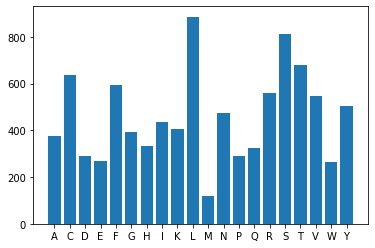

In [47]:
# Visualize the AA count of covid-19
plt.bar(covid19_freq.keys(),covid19_freq.values())

<BarContainer object of 20 artists>

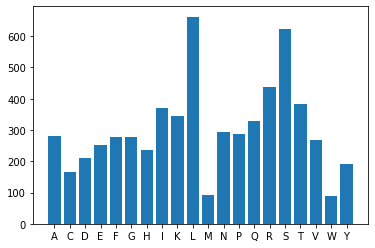

In [49]:
# Visualize the AA count of ebola
plt.bar(ebola_freq.keys(),ebola_freq.values())

In [ ]:
.